# Education Cost and Benefits Analysis

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import seaborn as sns

Private v Non-Private cost and Pay

In [2]:
dWV = pd.read_csv("Resources/Cost_And_Pay.csv")
dWV.head()

,Unnamed: 0,Rank,School_Name,School_Type,Early_Career_Pay,Mid-Career_Pay,% High_Meaning,%_STEM_Degrees,Private,Rank2015,Rank2014,cost_2015,cost_2014,percent_change,2yrcost,totalcost
0,415,416 (tie),Adelphi University,"Private School, Research University",51500,90600,0.50,0.06,True,353.0,360.0,47110.0,45200.0,4.23%,92310.0,184620.0
1,885,887 (tie),Agnes Scott College,"Liberal Arts School, Private School, Religious...",42900,78300,0.55,0.21,True,342.0,339.0,47323.0,45691.0,3.57%,93014.0,186028.0
2,661,662 (tie),Alaska Pacific University,"Private School, Religious",48800,83600,NaN,0.07,True,497.0,429.0,43180.0,43180.0,0.00%,86360.0,172720.0
3,929,931 (tie),Albertus Magnus College,"Business, Private School, Religious",48500,77500,0.60,0.01,True,344.0,305.0,47302.0,46528.0,1.66%,93830.0,187660.0
4,188,189 (tie),Albion College,"Liberal Arts School, Private School, Religious",48500,101700,0.48,0.24,True,317.0,334.0,48195.0,45884.0,5.04%,94079.0,188158.0


In [3]:
#comparing top ten private vs.top ten non-private (incl.State) for Total Cost (step 1 and step 2)
#Step 1: Top Ten Private colleges based on total cost
pvt_college_List = dWV[dWV['Private']==True]                                  
topTenPvtCollege_TotalCost = pvt_college_List.sort_values('totalcost', ascending = False)[:10]

topTenPvtCollege_TotalCost 

,Unnamed: 0,Rank,School_Name,School_Type,Early_Career_Pay,Mid-Career_Pay,% High_Meaning,%_STEM_Degrees,Private,Rank2015,Rank2014,cost_2015,cost_2014,percent_change,2yrcost,totalcost
239,70,70 (tie),New York University,"Private School, Research University",58700,117000,0.42,0.17,True,8.0,7.0,63540.0,61407.0,3.47%,124947.0,249894.0
93,10,11,Dartmouth College,"Ivy League, Private School, Research Universit...",66300,140300,0.46,0.32,True,11.0,8.0,63279.0,61398.0,3.06%,124677.0,249354.0
124,105,106,Fordham University,"Private School, Religious, Research University...",54400,111300,0.38,0.09,True,9.0,10.0,63438.0,61073.0,3.87%,124511.0,249022.0
149,0,1,Harvey Mudd College,"Engineering, Liberal Arts School, Private School",81000,155800,0.58,0.85,True,7.0,14.0,63860.0,60613.0,5.36%,124473.0,248946.0
244,94,95,Northwestern University,"Private School, Research University, For Sport...",59500,113300,0.48,0.19,True,12.0,11.0,63193.0,60840.0,3.87%,124033.0,248066.0
250,135,136 (tie),Occidental College,"Liberal Arts School, Private School",51800,107700,0.46,0.25,True,10.0,12.0,63363.0,60655.0,4.46%,124018.0,248036.0
429,66,67,Wesleyan University,"Liberal Arts School, Private School",55900,117700,0.59,0.22,True,13.0,9.0,62849.0,61167.0,2.75%,124016.0,248032.0
20,464,464 (tie),Bard College,"Liberal Arts School, Private School",48500,89000,0.49,0.00,True,14.0,17.0,62572.0,60280.0,3.80%,122852.0,245704.0
28,435,436 (tie),Bennington College,"Liberal Arts School, Private School",45800,90100,0.37,0.05,True,23.0,15.0,61920.0,60540.0,2.28%,122460.0,244920.0
355,124,124 (tie),Trinity College,"Liberal Arts School, Private School",55600,108700,0.49,0.18,True,16.0,22.0,62310.0,59865.0,4.08%,122175.0,244350.0


In [4]:
#Step 2 : Top Ten Non- Private colleges based on total cost (step 2 of 2)
NonPvt_college_List = dWV[dWV['Private']== False]
topTenNonPvtCollege_TotalCost = NonPvt_college_List.sort_values('totalcost', ascending = False)[:10]
topTenNonPvtCollege_TotalCost

,Unnamed: 0,Rank,School_Name,School_Type,Early_Career_Pay,Mid-Career_Pay,% High_Meaning,%_STEM_Degrees,Private,Rank2015,Rank2014,cost_2015,cost_2014,percent_change,2yrcost,totalcost
368,167,168,University of California-Santa Cruz,"Research University, State School",53500,103800,0.45,0.37,False,145.0,111.0,56031.0,56173.0,-0.25%,112204.0,224408.0
361,29,30,University of California-Berkeley,"Research University, For Sports Fans, State Sc...",65400,130100,0.49,0.34,False,142.0,119.0,56197.0,55766.0,0.77%,111963.0,223926.0
367,60,60 (tie),University of California-Santa Barbara,"Party School, Research University, For Sports ...",54900,118800,0.47,0.28,False,133.0,136.0,56929.0,54945.0,3.61%,111874.0,223748.0
362,107,108,University of California-Davis,"Research University, For Sports Fans, State Sc...",56700,110900,0.53,0.37,False,147.0,134.0,55944.0,55046.0,1.63%,110990.0,221980.0
364,80,81,University of California-Los Angeles,"Research University, For Sports Fans, State Sc...",57500,114800,0.47,0.31,False,160.0,140.0,55294.0,54810.0,0.88%,110104.0,220208.0
365,139,140 (tie),University of California-Riverside,"Research University, For Sports Fans, State Sc...",51600,107400,0.44,0.33,False,161.0,144.0,55116.0,54475.0,1.18%,109591.0,219182.0
363,59,60 (tie),University of California-Irvine,"Research University, For Sports Fans, State Sc...",54900,118800,0.48,0.32,False,192.0,171.0,53382.0,52906.0,0.90%,106288.0,212576.0
366,41,42,University of California-San Diego,"Engineering, Research University, State School",58600,124900,0.53,0.54,False,193.0,170.0,53348.0,52906.0,0.84%,106254.0,212508.0
382,158,158 (tie),University of Michigan-Ann Arbor,"Research University, For Sports Fans, State Sc...",59300,104600,0.46,0.38,False,188.0,183.0,53490.0,51976.0,2.91%,105466.0,210932.0
401,61,62 (tie),University of Virginia-Main Campus,"Research University, For Sports Fans, State Sc...",59500,118400,0.48,0.21,False,189.0,190.0,53461.0,51337.0,4.14%,104798.0,209596.0


In [5]:
#Comparing top ten private vs. top ten non-private (incl. State) for Early-career_Pay (step 1 of 2)
# step 1

pvt_college_List = dWV[dWV['Private']==True]  

topTenPvtCollege_EaryCareerPay = pvt_college_List.sort_values('Early_Career_Pay', ascending = False)[:10]

topTenPvtCollege_EaryCareerPay
#topTenPvtCollege_Early_CareerPay

#comparing top ten private vs. top ten non-private (incl. state) for Mid-Career_pay


,Unnamed: 0,Rank,School_Name,School_Type,Early_Career_Pay,Mid-Career_Pay,% High_Meaning,%_STEM_Degrees,Private,Rank2015,Rank2014,cost_2015,cost_2014,percent_change,2yrcost,totalcost
210,2,3,Massachusetts Institute of Technology,"Engineering, Private School, Research University",81500,147000,0.53,0.69,True,93.0,95.0,59020.0,57010.0,3.53%,116030.0,232060.0
149,0,1,Harvey Mudd College,"Engineering, Liberal Arts School, Private School",81000,155800,0.58,0.85,True,7.0,14.0,63860.0,60613.0,5.36%,124473.0,248946.0
45,6,7,California Institute of Technology,"Engineering, Private School, Research University",78800,142500,0.52,0.97,True,96.0,109.0,58755.0,56382.0,4.21%,115137.0,230274.0
335,9,10,Stanford University,"Private School, Research University, For Sport...",73300,140400,0.56,0.49,True,56.0,51.0,60749.0,58846.0,3.23%,119595.0,239190.0
289,39,40,Rose-Hulman Institute of Technology,"Engineering, Private School",71600,125900,0.51,0.98,True,128.0,128.0,57138.0,55413.0,3.11%,112551.0,225102.0
51,37,38,Carnegie Mellon University,"Engineering, Private School, Research University",70900,126400,0.46,0.64,True,20.0,26.0,62032.0,59710.0,3.89%,121742.0,243484.0
425,13,14,Webb Institute,"Engineering, Private School",70800,138200,NaN,1.00,True,26.0,1959.0,61820.0,18520.0,233.80%,80340.0,160680.0
337,16,17,Stevens Institute of Technology,"Engineering, Private School, Research University",70800,136900,0.50,0.80,True,59.0,40.0,60554.0,59260.0,2.18%,119814.0,239628.0
268,1,2,Princeton University,"Ivy League, Private School, Research Universit...",69800,147800,0.44,0.47,True,150.0,141.0,55832.0,54780.0,1.92%,110612.0,221224.0
148,8,9,Harvard University,"Ivy League, Private School, Research Universit...",69200,140700,0.56,0.19,True,72.0,92.0,59950.0,57050.0,5.08%,117000.0,234000.0


In [6]:
#topTenNon-PvtCollege_Early_CareerPay (step 2 of 2)
NonPvt_college_List = dWV[dWV['Private']== False]
topTenNonPvtCollege_EaryCareerPay = NonPvt_college_List.sort_values('Early_Career_Pay', ascending = False)[:10]
topTenNonPvtCollege_EaryCareerPay

,Unnamed: 0,Rank,School_Name,School_Type,Early_Career_Pay,Mid-Career_Pay,% High_Meaning,%_STEM_Degrees,Private,Rank2015,Rank2014,cost_2015,cost_2014,percent_change,2yrcost,totalcost
83,17,18,Colorado School of Mines,"Engineering, Research University, State School",71900,136100,0.60,0.94,False,371.0,384.0,46533.0,44531.0,4.50%,91064.0,182128.0
361,29,30,University of California-Berkeley,"Research University, For Sports Fans, State Sc...",65400,130100,0.49,0.34,False,142.0,119.0,56197.0,55766.0,0.77%,111963.0,223926.0
415,44,45,Virginia Military Institute,"Liberal Arts School, For Sports Fans, State Sc...",62200,124600,0.66,0.43,False,366.0,375.0,46630.0,44694.0,4.33%,91324.0,182648.0
236,54,54 (tie),New Jersey Institute of Technology,"Engineering, Research University, For Sports F...",60800,119700,0.52,0.71,False,440.0,415.0,44540.0,43590.0,2.18%,88130.0,176260.0
401,61,62 (tie),University of Virginia-Main Campus,"Research University, For Sports Fans, State Sc...",59500,118400,0.48,0.21,False,189.0,190.0,53461.0,51337.0,4.14%,104798.0,209596.0
382,158,158 (tie),University of Michigan-Ann Arbor,"Research University, For Sports Fans, State Sc...",59300,104600,0.46,0.38,False,188.0,183.0,53490.0,51976.0,2.91%,105466.0,210932.0
379,117,117 (tie),University of Illinois at Urbana-Champaign,"Party School, Research University, For Sports ...",58600,109600,0.46,0.37,False,484.0,452.0,43468.0,42706.0,1.78%,86174.0,172348.0
366,41,42,University of California-San Diego,"Engineering, Research University, State School",58600,124900,0.53,0.54,False,193.0,170.0,53348.0,52906.0,0.84%,106254.0,212508.0
364,80,81,University of California-Los Angeles,"Research University, For Sports Fans, State Sc...",57500,114800,0.47,0.31,False,160.0,140.0,55294.0,54810.0,0.88%,110104.0,220208.0
403,122,122 (tie),University of Washington-Seattle Campus,"Research University, For Sports Fans, State Sc...",57300,108800,0.53,0.32,False,369.0,414.0,46608.0,43621.0,6.85%,90229.0,180458.0


In [7]:
#comparing top ten private vs. top ten non-private (incl. state) for Mid-Career_pay(step 1 of 2)
#Step 1 of 2
pvt_college_List = dWV[dWV['Private']==True]  

topTenPvtCollege_MidCareerPay = pvt_college_List.sort_values('Mid-Career_Pay', ascending = False)[:10]

topTenPvtCollege_MidCareerPay

,Unnamed: 0,Rank,School_Name,School_Type,Early_Career_Pay,Mid-Career_Pay,% High_Meaning,%_STEM_Degrees,Private,Rank2015,Rank2014,cost_2015,cost_2014,percent_change,2yrcost,totalcost
149,0,1,Harvey Mudd College,"Engineering, Liberal Arts School, Private School",81000,155800,0.58,0.85,True,7.0,14.0,63860.0,60613.0,5.36%,124473.0,248946.0
268,1,2,Princeton University,"Ivy League, Private School, Research Universit...",69800,147800,0.44,0.47,True,150.0,141.0,55832.0,54780.0,1.92%,110612.0,221224.0
210,2,3,Massachusetts Institute of Technology,"Engineering, Private School, Research University",81500,147000,0.53,0.69,True,93.0,95.0,59020.0,57010.0,3.53%,116030.0,232060.0
45,6,7,California Institute of Technology,"Engineering, Private School, Research University",78800,142500,0.52,0.97,True,96.0,109.0,58755.0,56382.0,4.21%,115137.0,230274.0
19,7,8,Babson College,"Business, Private School",66600,141700,0.34,0.00,True,60.0,61.0,60504.0,58450.0,3.51%,118954.0,237908.0
148,8,9,Harvard University,"Ivy League, Private School, Research Universit...",69200,140700,0.56,0.19,True,72.0,92.0,59950.0,57050.0,5.08%,117000.0,234000.0
335,9,10,Stanford University,"Private School, Research University, For Sport...",73300,140400,0.56,0.49,True,56.0,51.0,60749.0,58846.0,3.23%,119595.0,239190.0
93,10,11,Dartmouth College,"Ivy League, Private School, Research Universit...",66300,140300,0.46,0.32,True,11.0,8.0,63279.0,61398.0,3.06%,124677.0,249354.0
439,11,12,Williams College,"Liberal Arts School, Private School",62000,138400,0.44,0.33,True,25.0,33.0,61850.0,59412.0,4.10%,121262.0,242524.0
425,13,14,Webb Institute,"Engineering, Private School",70800,138200,NaN,1.00,True,26.0,1959.0,61820.0,18520.0,233.80%,80340.0,160680.0


In [8]:
#topTenNon-PvtCollege_Early_CareerPay (step 2 of 2)
NonPvt_college_List = dWV[dWV['Private']== False]
topTenNonPvtCollege_MidCareerPay = NonPvt_college_List.sort_values('Mid-Career_Pay', ascending = False)[:10]
topTenNonPvtCollege_MidCareerPay

,Unnamed: 0,Rank,School_Name,School_Type,Early_Career_Pay,Mid-Career_Pay,% High_Meaning,%_STEM_Degrees,Private,Rank2015,Rank2014,cost_2015,cost_2014,percent_change,2yrcost,totalcost
83,17,18,Colorado School of Mines,"Engineering, Research University, State School",71900,136100,0.60,0.94,False,371.0,384.0,46533.0,44531.0,4.50%,91064.0,182128.0
361,29,30,University of California-Berkeley,"Research University, For Sports Fans, State Sc...",65400,130100,0.49,0.34,False,142.0,119.0,56197.0,55766.0,0.77%,111963.0,223926.0
366,41,42,University of California-San Diego,"Engineering, Research University, State School",58600,124900,0.53,0.54,False,193.0,170.0,53348.0,52906.0,0.84%,106254.0,212508.0
415,44,45,Virginia Military Institute,"Liberal Arts School, For Sports Fans, State Sc...",62200,124600,0.66,0.43,False,366.0,375.0,46630.0,44694.0,4.33%,91324.0,182648.0
236,54,54 (tie),New Jersey Institute of Technology,"Engineering, Research University, For Sports F...",60800,119700,0.52,0.71,False,440.0,415.0,44540.0,43590.0,2.18%,88130.0,176260.0
367,60,60 (tie),University of California-Santa Barbara,"Party School, Research University, For Sports ...",54900,118800,0.47,0.28,False,133.0,136.0,56929.0,54945.0,3.61%,111874.0,223748.0
363,59,60 (tie),University of California-Irvine,"Research University, For Sports Fans, State Sc...",54900,118800,0.48,0.32,False,192.0,171.0,53382.0,52906.0,0.90%,106288.0,212576.0
401,61,62 (tie),University of Virginia-Main Campus,"Research University, For Sports Fans, State Sc...",59500,118400,0.48,0.21,False,189.0,190.0,53461.0,51337.0,4.14%,104798.0,209596.0
364,80,81,University of California-Los Angeles,"Research University, For Sports Fans, State Sc...",57500,114800,0.47,0.31,False,160.0,140.0,55294.0,54810.0,0.88%,110104.0,220208.0
80,101,102,College of William and Mary,"Research University, For Sports Fans, State Sc...",54400,111900,0.44,0.20,False,228.0,223.0,51306.0,49712.0,3.21%,101018.0,202036.0


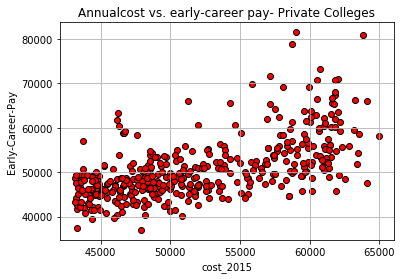

In [9]:
# scatter plot based on cost_2015 vs. early-career pay (all private college and all public colleges)
#Rationale is since early career pay is early we are trying to see recent available annual cost,which is 2015 cost
#3 steps
#step 1- Pvt colleges cost vs. early career pay (x= cost_2015, y= Early_Career_Pay )


pvt_college_List = dWV[dWV['Private']==True]  

fig, ax = plt.subplots()

plt.scatter(pvt_college_List.cost_2015, pvt_college_List.Early_Career_Pay , 
            facecolor= "red", 
            edgecolors="black", 
            label='',
            marker='o')
          
plt.title("Annualcost vs. early-career pay- Private Colleges")
plt.xlabel("cost_2015")
plt.ylabel("Early-Career-Pay")
ax.grid(True)


# Save Figure
plt.savefig('Images/pvtCostVsEarlycareerPay.png', bbox_inches = "tight")

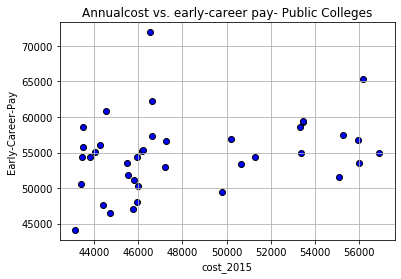

In [10]:
#step 2- non- Pvt colleges cost vs. early career pay (x= cost_2015, y= Early_Career_Pay )NonPvt_college_List = dWV[dWV['Private']== False]
fig, ax = plt.subplots()

plt.scatter(NonPvt_college_List.cost_2015, NonPvt_college_List.Early_Career_Pay , 
            facecolor= "Blue", 
            edgecolors="black", 
            label='',
            marker='o')
            
plt.title("Annualcost vs. early-career pay- Public Colleges")
plt.xlabel("cost_2015")
plt.ylabel("Early-Career-Pay")
ax.grid(True)


# Save Figure
plt.savefig('Images/non_pvtCostVsEarlycareerPay.png', bbox_inches = "tight")

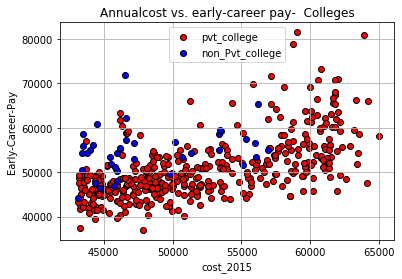

In [11]:
#step 3 _ Combined of step 1 and step2 -plotting both in one graph (pvt and non-private annual cost vs. early carrer pay)
x = range(40000,70000,2000)
y = range(40000,90000,5000)
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.scatter(pvt_college_List.cost_2015, pvt_college_List.Early_Career_Pay , 
            facecolor= "red", 
            edgecolors="black", 
            label='pvt_college',
            marker='o')
ax1.scatter(NonPvt_college_List.cost_2015, NonPvt_college_List.Early_Career_Pay , 
            facecolor= "Blue", 
            edgecolors="black", 
            label='non_Pvt_college',
            marker='o')
plt.title("Annualcost vs. early-career pay-  Colleges")
plt.xlabel("cost_2015")
plt.ylabel("Early-Career-Pay")
plt.legend(loc= 'upper center');
plt.grid()
plt.savefig('Images/combo_CostVsEarlycareerPay.png', bbox_inches = "tight")
plt.show()

# Observations:
    
Private colleges- There seems to be a correlation between what you pay and what you earn as early-career pay.
The majority of the data points cluster around in the range of early 40,000s to mid
50,000s for both Cost and Pay.
Cost of non- private schools are comparatively lesser than the private schools.
For Public schools, there seems to be no real trend and data is less evenly distributed to draw conclusions.

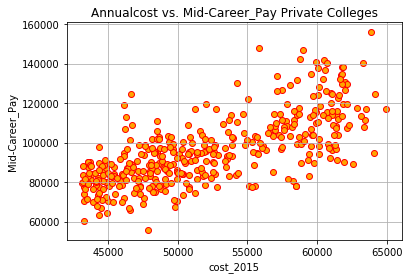

In [12]:
# scatter plot based on cost_2015 vs. mid-career pay (all private college and all public colleges)
#Rationale is since early career pay is early we are trying to see recent available annual cost,which is 2015 cost
#3 steps
#step 1- Pvt colleges cost vs. mid career pay (x= cost_2015, y= Mid-Career_Pay )

pvt_college_List = dWV[dWV['Private']==True]  

fig, ax = plt.subplots()
# first convert Mid-career_Pay to readable here, we are putting at as list, then for uniformity doing it on cost 2015 also.
plt.scatter(pvt_college_List["cost_2015"].tolist(), pvt_college_List["Mid-Career_Pay"].tolist(),
            facecolor= "orange", 
            edgecolors="Red", 
            label='',
            marker='o')
           
plt.title("Annualcost vs. Mid-Career_Pay Private Colleges")
plt.xlabel("cost_2015")
plt.ylabel("Mid-Career_Pay")
ax.grid(True)


# Save Figure
plt.savefig('Images/pvtCostVsMidCareerPay.png', bbox_inches = "tight")

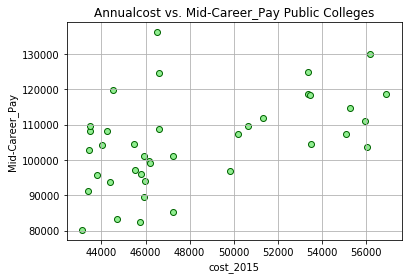

In [13]:
#step 2-Non Pvt colleges cost vs. Mid-career-pay (x= cost_2015, y= Mid-Career_Pay )

NonPvt_college_List = dWV[dWV['Private']== False]
fig, ax = plt.subplots()

plt.scatter(NonPvt_college_List["cost_2015"].tolist(), NonPvt_college_List["Mid-Career_Pay"].tolist(),
            facecolor= "lightgreen", 
            edgecolors="darkgreen", 
            label='',
            marker='o')
            
plt.title("Annualcost vs. Mid-Career_Pay Public Colleges")
plt.xlabel("cost_2015")
plt.ylabel("Mid-Career_Pay")
ax.grid(True)


# Save Figure
plt.savefig('Images/NonpvtCostVsMidCareerPay.png', bbox_inches = "tight")


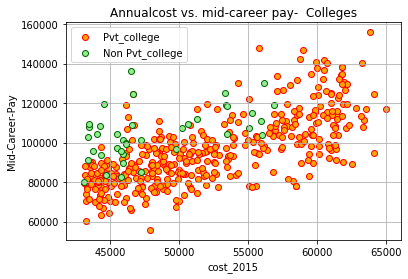

In [14]:
#step 3 _ Combined of step 1 and step2 -plotting both in one graph (pvt and non-private annual cost vs. Mid career pay)
x = range(40000,70000,2000)
y = range(70000,140000,10000)
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.scatter(pvt_college_List["cost_2015"].tolist(), pvt_college_List["Mid-Career_Pay"].tolist(),
            facecolor= "orange", 
            edgecolors="Red", 
            label='Pvt_college',
            marker='o')
ax1.scatter(NonPvt_college_List["cost_2015"].tolist(), NonPvt_college_List["Mid-Career_Pay"].tolist(),
            facecolor= "lightgreen", 
            edgecolors="darkgreen",
            label='Non Pvt_college',
            marker='o')
            
plt.title("Annualcost vs. mid-career pay-  Colleges")
plt.xlabel("cost_2015")
plt.ylabel("Mid-Career-Pay")
plt.legend(loc='best');
plt.grid()

plt.savefig('Images/combo_CostVsMidcareerPay.png', bbox_inches = "tight")
plt.show()

# Observations
 Mid career pay is the same trend as the early career pay for private colleges. The scale seems to follow a linear trend.
 The trend for public colleges between early pay and mid career pay seems to be similar. No real trend.




# What are the best/worst majors for ROI?



In [46]:
import pandas as pd                     
import matplotlib.pyplot as plt         
import numpy as np                       
from scipy.sparse import csr_matrix     
%matplotlib inline
# Read in data
DegreesDF = pd.read_csv('Resources/degrees-that-pay-back.csv',encoding ='cp1252')
earlyMidPayDF= pd.read_csv('Resources/early_mid_pay.csv',encoding ='cp1252')

In [47]:
#check data from each file
DegreesDF.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [48]:
earlyMidPayDF.head()

,Rank,Major,Degree Type,Early Career Pay,Mid Career Pay
0,1,Petroleum Engineering,Bachelor's,"$94,600","$175,500"
1,2,Actuarial Mathematics,Bachelor's,"$56,400","$131,700"
2,3,Actuarial Science,Bachelor's,"$61,200","$130,800"
3,4,Nuclear Engineering,Bachelor's,"$69,000","$127,500"
4,5,Chemical Engineering,Bachelor's,"$70,300","$124,500"


In [49]:
# UGMajor = "Petroleum Engineering", "Actuarial Mathematics", "Actuarial Science", "Nuclear Engineering", "Chemical Engineering "
# MidCareerPay = 175000, 131700, 130800, 127500, 124500
# x_axis = np.arange(len(UGMajor))
new_df = pd.DataFrame({"Major": earlyMidPayDF["Major"], "Mid Career Pay": earlyMidPayDF["Mid Career Pay"]})
new_df['Mid_Career_Pay_Numeric'] = new_df['Mid Career Pay'].replace('[\$,]', '', regex=True).astype(float)
new_df.head()

,Major,Mid Career Pay,Mid_Career_Pay_Numeric
0,Petroleum Engineering,"$175,500",175500.0
1,Actuarial Mathematics,"$131,700",131700.0
2,Actuarial Science,"$130,800",130800.0
3,Nuclear Engineering,"$127,500",127500.0
4,Chemical Engineering,"$124,500",124500.0


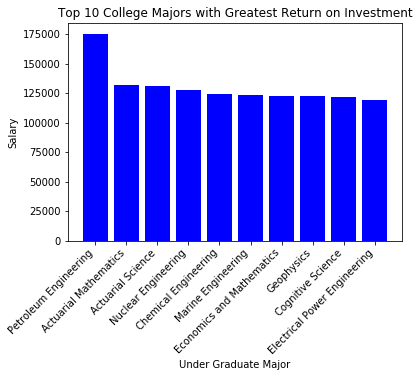

In [50]:
# Create the ticks for our bar chart's x axis
# Give the chart a title, x label, and y label
#Create a new DF 

Top10_df = new_df.sort_values('Mid_Career_Pay_Numeric', ascending = False)[:10]
Top10_df
x_axis = np.arange(0, len(Top10_df.Major))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("Top 10 College Majors with Greatest Return on Investment")
plt.xlabel("Under Graduate Major")
plt.ylabel("Salary")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Top10_df.Major, rotation = 45, horizontalalignment="right")
plt.bar(x_axis, Top10_df.Mid_Career_Pay_Numeric, color="b", align="center")

plt.savefig('Images/GreatestRoi.png', bbox_inches="tight")
plt.show()

# Observations:
based on the available data the top 10 college majors 
with the greatest Return on investment are from Petroleum Engineering 
Actuarial Math, Actuarial Science, Nucler Engineering, Chemical Engineering, Marine Engineering Economics and Mathematics,Geophysics cognitive Science, and Electrical Power Engineering. 
One thing we noticed was that the majors 
apart from Petroluim Engineering, has a relatively even distribution. They all range around the salary of $125,000

In [51]:
new_df1 = pd.DataFrame({"Major": earlyMidPayDF["Major"], "Mid Career Pay": earlyMidPayDF["Mid Career Pay"]})
new_df1['Mid_Career_Pay_Numeric'] = new_df1['Mid Career Pay'].replace('[\$,]', '', regex=True).astype(float)
#new_df1
new_df2 = new_df1.sort_values('Mid_Career_Pay_Numeric', ascending = True)[:10]
new_df2

,Major,Mid Career Pay,Mid_Career_Pay_Numeric
488,Early Childhood Education,"$40,400",40400.0
487,Child & Family Studies,"$42,100",42100.0
486,Veterinary Technology,"$43,100",43100.0
485,Early Childhood & Elementary Education,"$43,600",43600.0
484,Child Development,"$44,000",44000.0
483,Family Studies,"$44,500",44500.0
482,Human Services (HS),"$46,500",46500.0
481,Photojournalism,"$47,200",47200.0
480,Biblical Studies,"$47,800",47800.0
479,Social Work (SW),"$48,300",48300.0


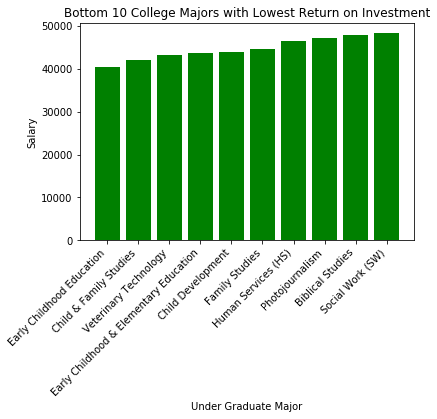

In [52]:
# Create the ticks for our bar chart's x axis
# Give the chart a title, x label, and y label
Bottom10_df = new_df2.sort_values('Mid_Career_Pay_Numeric')
Bottom10_df 
x_axis1 = np.arange(0, len(Bottom10_df.Major))
tick_locations = []
for x in x_axis1:
    tick_locations.append(x)
plt.title("Bottom 10 College Majors with Lowest Return on Investment")
plt.xlabel("Under Graduate Major")
plt.ylabel("Salary")
tick_locations = [value for value in x_axis1]
tick_locations
plt.xticks(tick_locations, Bottom10_df.Major, rotation = 45, horizontalalignment="right")
plt.bar(x_axis1, Bottom10_df.Mid_Career_Pay_Numeric, color="g", align="center")

plt.savefig('Images/LeastRoi.png', bbox_inches="tight")
plt.show()

# Observations
The college majors with the lowest return on investment are..
The bottom 5 are very similar in terms of the field in that they 
are all having to do with earyl childhood education/ development with the exception of veterinary technology.
There is a significant difference between the pay scales of the top 10 and bottom 10 majors (175,000 𝑡𝑜 125,000) 
All bottom five seem to be very close in pay, ranging around $40,000.

In [53]:
# get the undergraduate majors with best potential for increase
# track percent change of majors with biggest percent change
# Rank top 10 jumps in salary
top10CareerJumps = DegreesDF.sort_values('Percent change from Starting to Mid-Career Salary', ascending = False)
top10CareerJumps[:10]

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
37,Math,"$45,400.00","$92,400.00",103.5,"$45,200.00","$64,200.00","$128,000.00","$183,000.00"
42,Philosophy,"$39,900.00","$81,200.00",103.5,"$35,500.00","$52,800.00","$127,000.00","$168,000.00"
33,International Relations,"$40,900.00","$80,900.00",97.8,"$38,200.00","$56,000.00","$111,000.00","$157,000.00"
17,Economics,"$50,100.00","$98,600.00",96.8,"$50,600.00","$70,600.00","$145,000.00","$210,000.00"
36,Marketing,"$40,800.00","$79,600.00",95.1,"$42,100.00","$55,600.00","$119,000.00","$175,000.00"
44,Physics,"$50,300.00","$97,300.00",93.4,"$56,000.00","$74,200.00","$132,000.00","$178,000.00"
45,Political Science,"$40,800.00","$78,200.00",91.7,"$41,200.00","$55,300.00","$114,000.00","$168,000.00"
9,Chemistry,"$42,600.00","$79,900.00",87.6,"$45,300.00","$60,700.00","$108,000.00","$148,000.00"
34,Journalism,"$35,600.00","$66,700.00",87.4,"$38,400.00","$48,300.00","$97,700.00","$145,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [56]:
# get the undergraduate majors with least potential for increase
# track percent change of majors with least percent change
# Rank bottom 10 jumps in salary
bottom10CareerJumps = DegreesDF.sort_values('Percent change from Starting to Mid-Career Salary', ascending = True)
bottom10CareerJumps[:10]

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,MidCareer10thNumber,MidCareer90thNumber
43,Physician Assistant,"$74,300.00","$91,700.00",23.4,"$66,400.00","$75,200.00","$108,000.00","$124,000.00",66400.0,124000.0
40,Nursing,"$54,200.00","$67,000.00",23.6,"$47,600.00","$56,400.00","$80,900.00","$98,300.00",47600.0,98300.0
41,Nutrition,"$39,900.00","$55,300.00",38.6,"$33,900.00","$44,500.00","$70,500.00","$99,200.00",33900.0,99200.0
32,Interior Design,"$36,100.00","$53,200.00",47.4,"$35,700.00","$42,600.00","$72,500.00","$107,000.00",35700.0,107000.0
18,Education,"$34,900.00","$52,000.00",49.0,"$29,300.00","$37,900.00","$73,400.00","$102,000.00",29300.0,102000.0
29,Hospitality & Tourism,"$37,800.00","$57,500.00",52.1,"$35,500.00","$43,600.00","$81,900.00","$124,000.00",35500.0,124000.0
31,Information Technology (IT),"$49,100.00","$74,800.00",52.3,"$44,500.00","$56,700.00","$96,700.00","$129,000.00",44500.0,129000.0
47,Religion,"$34,100.00","$52,000.00",52.5,"$29,700.00","$36,500.00","$70,900.00","$96,400.00",29700.0,96400.0
39,Music,"$35,900.00","$55,000.00",53.2,"$26,700.00","$40,200.00","$88,000.00","$134,000.00",26700.0,134000.0
49,Spanish,"$34,000.00","$53,100.00",56.2,"$31,000.00","$40,000.00","$76,800.00","$96,400.00",31000.0,96400.0


In [67]:
# biggest difference on top and bottom half
# difference between 10th nd 90th percentiles
# add 2 columns to represent number values for percentiles
DegreesDF['MidCareer10thNumber'] = DegreesDF['Mid-Career 10th Percentile Salary'].replace('[\$,]', '', regex=True).astype(float)
DegreesDF['MidCareer90thNumber'] = DegreesDF['Mid-Career 90th Percentile Salary'].replace('[\$,]', '', regex=True).astype(float)
DegreesDF['10th90thDiff'] = DegreesDF['MidCareer90thNumber'] - DegreesDF['MidCareer10thNumber']
DegreesDF.sort_values('10th90thDiff', ascending = False)[:10]
#DegreesDF

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,MidCareer10thNumber,MidCareer90thNumber,Mid-CareerMeanNumber,10th90thDiff
17,Economics,"$50,100.00","$98,600.00",96.8,"$50,600.00","$70,600.00","$145,000.00","$210,000.00",50600.0,210000.0,98600.0,159400.0
22,Finance,"$47,900.00","$88,300.00",84.3,"$47,200.00","$62,100.00","$128,000.00","$195,000.00",47200.0,195000.0,88300.0,147800.0
37,Math,"$45,400.00","$92,400.00",103.5,"$45,200.00","$64,200.00","$128,000.00","$183,000.00",45200.0,183000.0,92400.0,137800.0
36,Marketing,"$40,800.00","$79,600.00",95.1,"$42,100.00","$55,600.00","$119,000.00","$175,000.00",42100.0,175000.0,79600.0,132900.0
42,Philosophy,"$39,900.00","$81,200.00",103.5,"$35,500.00","$52,800.00","$127,000.00","$168,000.00",35500.0,168000.0,81200.0,132500.0
45,Political Science,"$40,800.00","$78,200.00",91.7,"$41,200.00","$55,300.00","$114,000.00","$168,000.00",41200.0,168000.0,78200.0,126800.0
8,Chemical Engineering,"$63,200.00","$107,000.00",69.3,"$71,900.00","$87,300.00","$143,000.00","$194,000.00",71900.0,194000.0,107000.0,122100.0
44,Physics,"$50,300.00","$97,300.00",93.4,"$56,000.00","$74,200.00","$132,000.00","$178,000.00",56000.0,178000.0,97300.0,122000.0
33,International Relations,"$40,900.00","$80,900.00",97.8,"$38,200.00","$56,000.00","$111,000.00","$157,000.00",38200.0,157000.0,80900.0,118800.0
16,Drama,"$35,900.00","$56,900.00",58.5,"$36,700.00","$41,300.00","$79,100.00","$153,000.00",36700.0,153000.0,56900.0,116300.0


In [68]:
#careers with least variance between top and bottom
#careers with least variance between top and bottom
DegreesDF.sort_values('10th90thDiff')[:10]

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,MidCareer10thNumber,MidCareer90thNumber,Mid-CareerMeanNumber,10th90thDiff
40,Nursing,"$54,200.00","$67,000.00",23.6,"$47,600.00","$56,400.00","$80,900.00","$98,300.00",47600.0,98300.0,67000.0,50700.0
43,Physician Assistant,"$74,300.00","$91,700.00",23.4,"$66,400.00","$75,200.00","$108,000.00","$124,000.00",66400.0,124000.0,91700.0,57600.0
41,Nutrition,"$39,900.00","$55,300.00",38.6,"$33,900.00","$44,500.00","$70,500.00","$99,200.00",33900.0,99200.0,55300.0,65300.0
49,Spanish,"$34,000.00","$53,100.00",56.2,"$31,000.00","$40,000.00","$76,800.00","$96,400.00",31000.0,96400.0,53100.0,65400.0
27,Health Care Administration,"$38,800.00","$60,600.00",56.2,"$34,600.00","$45,600.00","$78,800.00","$101,000.00",34600.0,101000.0,60600.0,66400.0
47,Religion,"$34,100.00","$52,000.00",52.5,"$29,700.00","$36,500.00","$70,900.00","$96,400.00",29700.0,96400.0,52000.0,66700.0
23,Forestry,"$39,100.00","$62,600.00",60.1,"$41,000.00","$49,300.00","$78,200.00","$111,000.00",41000.0,111000.0,62600.0,70000.0
32,Interior Design,"$36,100.00","$53,200.00",47.4,"$35,700.00","$42,600.00","$72,500.00","$107,000.00",35700.0,107000.0,53200.0,71300.0
18,Education,"$34,900.00","$52,000.00",49.0,"$29,300.00","$37,900.00","$73,400.00","$102,000.00",29300.0,102000.0,52000.0,72700.0
15,Criminal Justice,"$35,000.00","$56,300.00",60.9,"$32,200.00","$41,600.00","$80,700.00","$107,000.00",32200.0,107000.0,56300.0,74800.0


In [69]:
#convert median salary to number
DegreesDF['Mid-CareerMeanNumber'] = DegreesDF['Mid-Career Median Salary'].replace('[\$,]', '', regex=True).astype(float)

In [70]:
#descriptive statistics
#variance
DegreesDF['Mid-CareerMeanNumber'].var()

258836738.7755102

In [71]:
#standard deviation
DegreesDF['Mid-CareerMeanNumber'].std()

16088.403860405488